In [592]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [593]:
df = pd.read_csv('hw5_treasury yield curve data.csv')

In [594]:
df=df.dropna()

In [595]:
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [596]:
#df.describe()

In [597]:
datX = df[df.columns[1:31]]

In [598]:
#datX

In [599]:
datX = pd.concat([datX], axis=1)
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#sc.fit(datX)
#datX_std = sc.transform(datX)

In [600]:
from pandas import DataFrame
#dataX = DataFrame.from_records(datX_std)
#not scaler at this point 
dataX = datX

In [601]:
datanumy = df[df.columns[31]]

In [602]:
#datanumy

In [603]:
dataXy= pd.concat([dataX, datanumy],axis=1)
#dataXy

In [604]:
cols = ['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05','SVENF06','SVENF07','SVENF08','SVENF09','SVENF10','SVENF11','SVENF12','SVENF13','SVENF14','SVENF15','SVENF16','SVENF17','SVENF18','SVENF19','SVENF20','SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close']

In [605]:
col30 = ['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05','SVENF06','SVENF07','SVENF08','SVENF09','SVENF10','SVENF11','SVENF12','SVENF13','SVENF14','SVENF15','SVENF16','SVENF17','SVENF18','SVENF19','SVENF20','SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30']

In [606]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)

cm30 = np.corrcoef(df[col30].values.T)
 

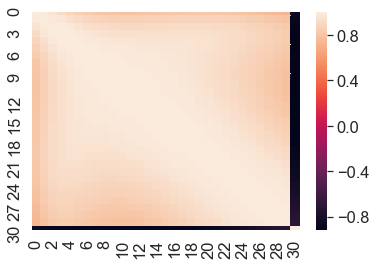

In [607]:
heat_map = sns.heatmap(cm)
plt.show()

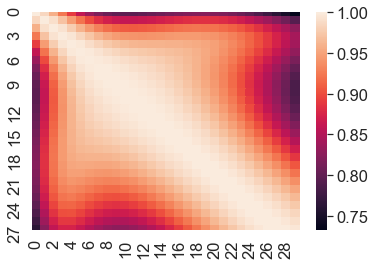

In [608]:
heat_map = sns.heatmap(cm30)
#plt.axis('equal')

plt.show()


In [609]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [610]:
X = dataXy.iloc[:, 0:30].values


In [611]:
X.shape

(8071, 30)

In [612]:
y = dataXy['Adj_Close'].values

In [613]:
#Split data into training and test sets.  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

In [614]:
#2.pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

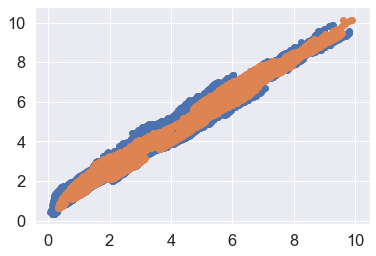

0.9863786944334032


In [615]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# bond
bond0 = X_train[:,0]
bond1 = X_train[:,1]
bond2 = X_train[:,2]

# yield
ye = y_train

# Scatter plot from each treasury, here we only see first 3 correlation
plt.scatter(bond0, bond1)
plt.scatter(bond1, bond2)
#plt.scatter(bond2, ye)
#plt.axis('')
plt.show()


# Calculate the Pearson correlation
correlation, pvalue = pearsonr(bond0, bond1)

# Display the correlation
print(correlation)

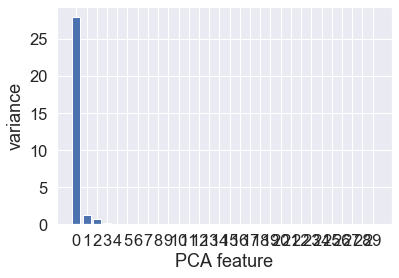

In [627]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
#del range
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'X_train_std'
pipeline.fit(X_train_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

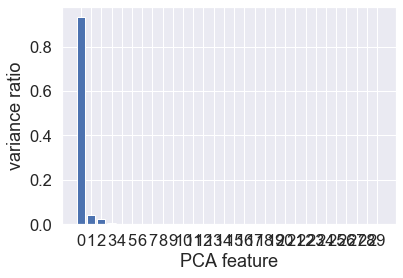

In [629]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance ratio')
plt.xticks(features)
plt.show()

In [630]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 3 components: pca
pca = PCA(n_components=3)

# Fit the PCA instance to the scaled samples
sc.fit(X_train)
X_train_std = sc.transform(X_train_std)
X_test_std = sc.transform(X_test_std)

pca.fit(X_train_std)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_train_std)
#pca_features_ = pca.transform(X_test_std)
# Print the shape of pca_features
print(pca_features.shape)


(6860, 3)


In [631]:
print(pca.explained_variance_)

[2.09233761 0.09962215 0.02142033]


In [632]:
pca.explained_variance_ratio_

array([0.94114805, 0.04481074, 0.00963501])

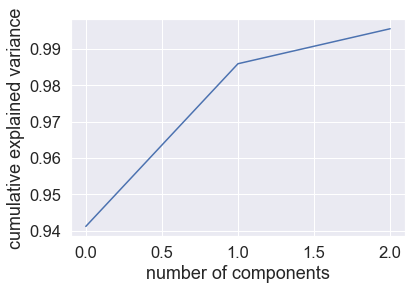

In [633]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [634]:
#3.
from sklearn.metrics import mean_squared_error
from math import sqrt
#rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [635]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
#using original data to fit linear model
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)


Slope: -4.992
Intercept: 11.818


In [636]:
##R² score of our model,this is the percentage of explained variance of the predictions. 
slr.score(X,y)

0.902623691865635

In [637]:
#evaluate the performance of the linear regression model using predictions and test set
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [638]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, y_train_pred)),
       sqrt(mean_squared_error(y_test, y_test_pred))))

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904
RMSE train: 0.777, test: 0.782


In [641]:
#using pca features to fit linear regression model
slr = LinearRegression()
slr.fit(X_train_std, y_train)
y_train_predpca = slr.predict(X_train_std)
y_test_predpca = slr.predict(X_test_std)

In [642]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_predpca),
        mean_squared_error(y_test, y_test_predpca)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_predpca),
        r2_score(y_test, y_test_predpca)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, y_train_predpca)),
       sqrt(mean_squared_error(y_test, y_test_predpca))))

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904
RMSE train: 0.777, test: 0.782


In [644]:
#using SVR for original data 
from sklearn.svm import SVR

In [646]:
#SVM regressor model with original dataset
SVR = svm.SVR(kernel="linear").fit(X_train, y_train)
SVR.predict(X_test)

y_train_pred = SVR.predict(X_train)
y_test_pred = SVR.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, y_train_pred)),
       sqrt(mean_squared_error(y_test, y_test_pred))))
round(SVR.score(X_test, y_test), 4)

MSE train: 0.658, test: 0.674
R^2 train: 0.893, test: 0.894
RMSE train: 0.811, test: 0.821


0.8944

In [649]:
#SVR regressor model with pca dataset
SVR = svm.SVR(kernel="linear").fit(X_train_pca, y_train)
SVR.predict(X_test_pca)

y_train_pred = SVR.predict(X_train_pca)
y_test_pred = SVR.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, y_train_pred)),
       sqrt(mean_squared_error(y_test, y_test_pred))))
round(SVR.score(X_test_pca, y_test), 4)

MSE train: 0.666, test: 0.686
R^2 train: 0.892, test: 0.893
RMSE train: 0.816, test: 0.828


0.8925

In [ ]:
print("My name is {Xuehui Chao}")
print("My NetID is: {xuehuic2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

